In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme('notebook')

# 1. Prepare and preprocessing data

## 1.1 Channels dataset

### 1. Đọc dữ liệu

In [2]:
channel_df = pd.read_csv('Data/channels.csv')
channel_df

,Channel,PlaylistId,PublishedTime,Views,Subscribers,Videos
0,FAPTV,UU0jDoh3tVXCaqJ6oTve8ebA,2014-02-26T15:44:42Z,4870041141,13300000,567
1,ĐÔNG TÂY PROMOTION OFFICIAL,UUFMEYTv6N64hIL9FlQ_hxBw,2014-12-17T03:07:44Z,4867786232,8080000,7773
2,DIEN QUAN Comedy / Hài,UUwmurIyZ6FHyVPtKppe_2_A,2014-12-17T06:57:46Z,3941420767,5940000,4051
3,VTV Giải Trí Official,UUuJ5k3GndbHnXLYyiIR6Z8Q,2018-12-20T07:33:59Z,2075532878,2450000,8890
4,Vie Channel - HTV2,UUkna2OcuN1E6u5I8GVtdkOw,2012-06-04T08:47:14Z,4311560277,9860000,8593


### 2. Kiểu dữ liệu có gì bất thường

In [3]:
channel_df.dtypes

Channel          object
PlaylistId       object
PublishedTime    object
Views             int64
Subscribers       int64
Videos            int64
dtype: object

### Tiền xử lý Datetime: ở đây chỉ quan tâm tới ngày tháng

In [4]:
channel_df['PublishedTime'] = channel_df['PublishedTime'].str.extract(r'(\d+\-\d+\-\d+)')
channel_df['PublishedTime'] = pd.to_datetime(channel_df['PublishedTime'])

In [5]:
channel_df.dtypes

Channel                  object
PlaylistId               object
PublishedTime    datetime64[ns]
Views                     int64
Subscribers               int64
Videos                    int64
dtype: object

## 1.2 Information dataset

### 1. Đọc dữ liệu

In [6]:
information_df = pd.read_csv('Data/information_video.csv')
information_df.head()

,VideoId,Channel,Title,publishedTime,CategoryId,Description,Duration,Dimension,Caption,Tags,Views,Likes,Comments
0,LObx_aVfpuA,VTV Giải Trí Official,Chồng cũ vợ cũ người yêu cũ tập 22 | Một pha '...,2022-07-08T15:30:09Z,24,▶️ Full Chồng cũ vợ cũ người yêu cũ tập 22: ht...,PT5M9S,2d,False,"['vtv giải trí', 'vtv giai tri', 'phim hay', '...",10890,91,5
1,a8-B8yByqK0,VTV Giải Trí Official,TRỰC TIẾP VTV3 | Chồng cũ vợ cũ người yêu cũ t...,2022-07-08T14:30:12Z,24,TRỰC TIẾP VTV3 | Chồng cũ vợ cũ người yêu cũ t...,PT4M9S,2d,False,"['vtv giải trí', 'vtv giai tri', 'phim hay', '...",30827,158,5
2,B2WuOIw9w9U,VTV Giải Trí Official,Lối Nhỏ Vào Đời - Tập 21 | Bác Thành đau khổ c...,2022-07-08T14:30:02Z,24,Lối Nhỏ Vào Đời - Tập 21 | Bác Thành đau khổ c...,PT5M8S,2d,False,"['vtv giải trí', 'vtv giai tri', 'phim hay', '...",24188,184,16
3,0kjiyMoIeU0,VTV Giải Trí Official,TRỰC TIẾP VTV1 | TẬP 21: Lối Nhỏ Vào Đời,2022-07-08T14:00:13Z,24,TRỰC TIẾP VTV1 | TẬP 21: Lối Nhỏ Vào Đời \n👉 X...,PT4M1S,2d,False,"['vtv giải trí', 'vtv giai tri', 'phim hay', '...",33323,163,17
4,lL_UZK0Zdxo,VTV Giải Trí Official,Chồng cũ vợ cũ người yêu cũ tập 21 | Vợ mới từ...,2022-07-08T11:45:03Z,24,▶️ Full Chồng cũ vợ cũ người yêu cũ tập 21: ht...,PT4M9S,2d,False,"['vtv giải trí', 'vtv giai tri', 'phim hay', '...",8730,40,1


### 2. Dữ liệu có bao nhiêu dòng và cột

In [7]:
num_rows, num_cols = information_df.shape
print(f'Dữ liệu có {num_rows} dòng')
print(f'Dữ liệu có {num_cols} cột')

Dữ liệu có 29899 dòng
Dữ liệu có 13 cột


### 3. Kiểu dữ liệu có gì bất thường

In [8]:
information_df.dtypes

VideoId          object
Channel          object
Title            object
publishedTime    object
CategoryId        int64
Description      object
Duration         object
Dimension        object
Caption            bool
Tags             object
Views             int64
Likes             int64
Comments          int64
dtype: object

### Tiền xử lý

In [9]:
! pip install python-dateutil
! pip install isodate

In [10]:
from dateutil import parser
import isodate

- **Chuyển về dạng datetime và thêm vào cột "publishedDayName" tương ứng ngày trong tuần**

In [11]:
information_df['publishedTime'] = information_df['publishedTime'].apply(lambda x: parser.parse(x))
information_df['publishedDayName'] = information_df['publishedTime'].apply(lambda x: x.strftime('%A'))
information_df[['publishedTime','publishedDayName']].tail()

,publishedTime,publishedDayName
29894,2012-06-22 06:53:14+00:00,Friday
29895,2012-06-14 10:14:36+00:00,Thursday
29896,2012-06-08 05:02:08+00:00,Friday
29897,2012-06-08 04:49:13+00:00,Friday
29898,2012-06-07 03:02:16+00:00,Thursday


- **Chuyển Duration của video về seconds**

In [12]:
information_df['durationSecond'] = information_df['Duration'].apply(lambda x: isodate.parse_duration(x))
information_df['durationSecond'] = information_df['durationSecond'].astype('timedelta64[s]')
information_df[['Duration','durationSecond']].head()

,Duration,durationSecond
0,PT5M9S,309.0
1,PT4M9S,249.0
2,PT5M8S,308.0
3,PT4M1S,241.0
4,PT4M9S,249.0


In [13]:
# kiểm tra lại
information_df.dtypes

VideoId                              object
Channel                              object
Title                                object
publishedTime       datetime64[ns, tzutc()]
CategoryId                            int64
Description                          object
Duration                             object
Dimension                            object
Caption                                bool
Tags                                 object
Views                                 int64
Likes                                 int64
Comments                              int64
publishedDayName                     object
durationSecond                      float64
dtype: object

### 4.Thêm vào số lượng tags cho video

In [14]:
# tiền xử lý giá trị vì Tags ban đầu là string
information_df['Tags'] = information_df['Tags'].apply(lambda x : x.lstrip('[').rstrip(']').strip().split(', '))
information_df['Tags'] = information_df['Tags'].apply(lambda x: [i.strip("'") for i in x])

In [15]:
information_df['tagCount'] = information_df['Tags'].apply(lambda x: len(x))
information_df[['Tags','tagCount']].head()

,Tags,tagCount
0,"[vtv giải trí, vtv giai tri, phim hay, phim vt...",26
1,"[vtv giải trí, vtv giai tri, phim hay, phim vt...",20
2,"[vtv giải trí, vtv giai tri, phim hay, phim vt...",23
3,"[vtv giải trí, vtv giai tri, phim hay, phim vt...",24
4,"[vtv giải trí, vtv giai tri, phim hay, phim vt...",27


### 5.Thêm vào Category tương ứng với CategoryId

In [16]:
category_df = pd.read_csv('Data/category_video.csv')

In [17]:
# merge 2 DataFrame lại với nhau
information_df = information_df.merge(category_df, on='CategoryId')
information_df[['CategoryId','Category']].tail()

,CategoryId,Category
29894,26,Howto & Style
29895,26,Howto & Style
29896,26,Howto & Style
29897,27,Education
29898,27,Education


### 6. Thêm vào danh sách nghệ sĩ tham gia vào video(nếu có)
- **Dựa vào hashtag trong descrition**

In [18]:
! pip install pyvi

In [19]:
from pyvi import ViTokenizer, ViPosTagger

## 2. EDA

### 2.1. Trực quan dữ liệu số lượt xem/video, số lượng subscriber của các channels trên.

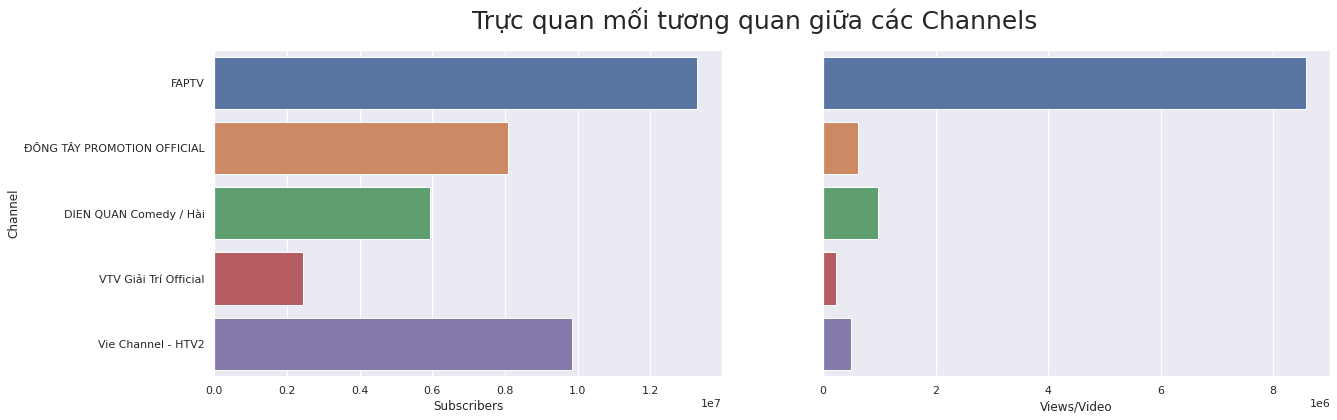

In [20]:
fig, axs = plt.subplots(1,2, figsize = (20,6))
sns.barplot(y = 'Channel' , x = 'Subscribers', data = channel_df, ax = axs[0])
sns.barplot(y = channel_df['Channel'], x = channel_df['Views'] / channel_df['Videos'], ax = axs[1])

axs[1].get_yaxis().set_visible(False)
axs[0].set_xlabel('Subscribers', fontsize = 12)
axs[1].set_xlabel('Views/Video', fontsize = 12)
plt.suptitle('Trực quan mối tương quan giữa các Channels', fontsize = 25)
plt.show()

### 